In [1]:
from sklearn import datasets
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [4]:
pca = PCA(n_components=2)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
selection = SelectKBest(k=1)
selection

SelectKBest(k=1, score_func=<function f_classif at 0x000001B5ED8E2268>)

In [6]:
#build estimator from PCA and Univariate selection
combined_features = FeatureUnion([('pca',pca),('univ_select', selection)])

In [7]:
#use combined features to transform dataset
X_features = combined_features.fit(X,y).transform(X)
svm = SVC(kernel='linear')

In [9]:
#do grid search over k,n_components and C
pipeline = Pipeline([("features",combined_features),("svm",svm)])
param_grid = dict(features__pca__n_components=[1,2,3],
                 features__univ_select__k=[1,2],
                 svm__C=[0.1,1,10])
grid_search = GridSearchCV(pipeline,param_grid=param_grid,verbose=10)

grid_search.fit(X,y)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.9607843137254902, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.9019607843137255, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.9791666666666666, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.9411764705882353, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.92156862745098

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=10, score=0.9411764705882353, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=10, score=0.9791666666666666, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=2, features__univ_select__k=2, svm__C=0.1, score=0.9803921568627451, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=2, features__univ_select__k=2, svm__C=0.1, score=0.9411764705882353, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=2, features__univ_select__k=2, svm__C=0.1, score=0.9791666666666666, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=2, svm__C=1 
[CV]  features__pca__n_components=2, fea

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.3s finished


In [ ]:
#prediction = grid_search.best_estimator_.predict(X_test)

In [10]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [11]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr,X,y,cv=10)

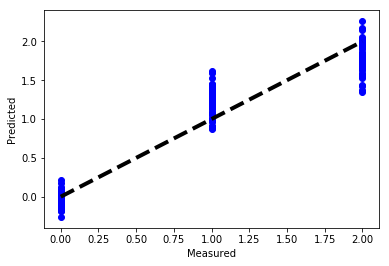

In [13]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(y,y_pred,color='blue')
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()